**Name: Sunita Pradhan**

**Domain: Sales & Marketing**

**Project: Stores Sales Prediction**

**Tech Stack: Python, Machine Learning**

--------------

In [41]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_validation, metrics
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df1 = pd.read_csv('Cleaned Train.csv')
df2 = pd.read_csv('Cleaned Test.csv')

In [3]:
# One hot encoding the categorical variables in both train set
item_fat_content=pd.get_dummies(df1['Item_Fat_Content'])

item_type=pd.get_dummies(df1['Item_Type'])

outlet_size=pd.get_dummies(df1['Outlet_Size'])

outlet_location_type=pd.get_dummies(df1['Outlet_Location_Type'])

outlet_type=pd.get_dummies(df1['Outlet_Type'])

# One hot encoding the categorical variables in both test set
item_fat_content_test=pd.get_dummies(df2['Item_Fat_Content'])

item_type_test=pd.get_dummies(df2['Item_Type'])

outlet_size_test=pd.get_dummies(df2['Outlet_Size'])

outlet_location_type_test=pd.get_dummies(df2['Outlet_Location_Type'])

outlet_type_test=pd.get_dummies(df2['Outlet_Type'])

In [4]:

train=df1
train=pd.concat([train,item_fat_content,item_type,outlet_size,outlet_location_type,outlet_type],axis=1)
train.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier',
            'Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],axis=1,inplace=True)

test=df2
test=pd.concat([test,item_fat_content_test,item_type_test,outlet_size_test,outlet_location_type_test,outlet_type_test],axis=1)
test.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier',
           'Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],axis=1,inplace=True)

In [5]:
train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Low Fat,Non-Edible,Regular,Drinks,Foods,Non-Consumable,...,Medium,Small,Unknown,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,2097.2700,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,19.200,0.066132,182.0950,732.3800,0,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,8.930,0.066132,53.8614,994.7052,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,549.2850,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [6]:
test

,Item_Weight,Item_Visibility,Item_MRP,Low Fat,Non-Edible,Regular,Drinks,Foods,Non-Consumable,High,Medium,Small,Unknown,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.750000,0.007565,107.8622,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
5677,7.600000,0.142991,169.1448,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
5678,10.000000,0.073529,118.7440,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
5679,15.300000,0.065684,214.6218,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0


In [7]:

x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']
x_test=test

In [8]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

x_test=sc_x.fit_transform(x_test)
     

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# perdiction for the test data

lin_pred = lin_reg.predict(X_test)
lin_pred

array([ 1336.01896952,   681.01896952,   830.01896952,  4232.51896952,
        3339.01896952,   623.51896952,  4727.01896952,  2032.01896952,
        1376.01896952,  2756.01896952,  -248.98103048,  2098.01896952,
        3845.01896952,   903.01896952,   834.01896952,  4308.01896952,
        1879.01896952,  1843.01896952,  2042.01896952,  3199.01896952,
        3187.01896952,  2634.01896952,  2937.01896952,  2488.01896952,
        4143.26896952,  2268.51896952,   501.01896952,  3734.01896952,
        3062.51896952,  3781.01896952,   844.01896952,  2766.01896952,
        2437.01896952,  3080.01896952,   602.01896952,  1409.01896952,
         874.51896952,  2073.01896952,  1286.01896952,  2888.01896952,
        -651.98103048,  2192.01896952,  1501.01896952,  1538.01896952,
        2584.01896952,  1411.01896952,   899.51896952,   884.01896952,
        4039.26896952,  1968.01896952,   873.26896952,  2376.01896952,
        1016.01896952, -1027.98103048,   700.01896952,  1896.76896952,
      

In [51]:
lin_accuracy = round(lin_reg.score(X_train,y_train),2)
lin_accuracy

0.56

#### visualize the relationship between the features and the response using scatterplots

Text(0, 0.5, 'Test predicted data')

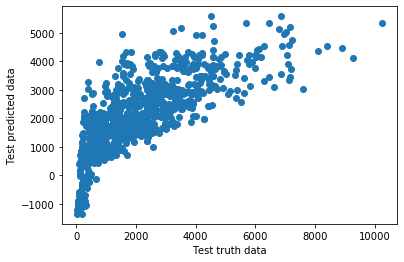

In [14]:
# truth point and predicted point

plt.scatter(y_test, lin_pred)       
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

#### Residuals

In [15]:
residuals = y_test - lin_pred
residuals

7503     407.04543
2957    -324.15017
7031    -452.51037
1084    1545.95923
856     -982.08697
           ...    
7118    3447.62103
7364    1357.91103
4128       2.81943
6440     102.19863
2688     441.22623
Name: Item_Outlet_Sales, Length: 853, dtype: float64

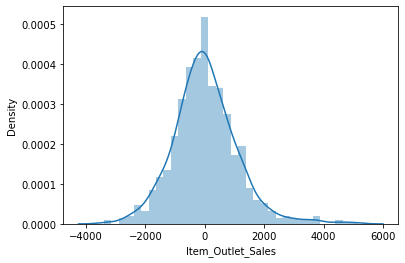

In [16]:
sns.distplot(residuals)

#### Check for Homoscedasticity

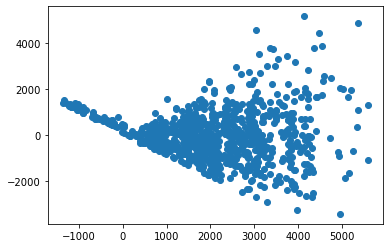

In [17]:
# scattter plot with predictions and residuals

plt.scatter(lin_pred, residuals)

####  Performance metrics

In [20]:
print(mean_squared_error(y_test, lin_pred))
print(mean_absolute_error(y_test,lin_pred))
print(np.sqrt(mean_squared_error(y_test, lin_pred)))

1184848.9241619995
806.5317215382273
1088.5076592114542


#### R square and adjusted R square

In [22]:
score = r2_score(y_test, lin_pred)
print(score)

0.5762121892555181


####  Adjusted r square

In [23]:
1 - (1-score)*(len(y_test)-1) / (len(y_test) - X_test.shape[1]-1)

0.566024982266468

## Random Forest

In [34]:
#rf=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)
rf = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)

rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
predictions=rf.predict(X_test)
predictions

array([1252.01668642,  673.25109905,  664.47979122, 4608.63677491,
       3106.58517357,  586.46423536, 5562.47558858, 1969.76762566,
       1571.32625953, 2966.46124609,  216.27593002,  593.89468238,
       4017.93535463,  712.31452286,  802.18972524, 4167.31318073,
       1889.31091684, 1635.18082086, 2058.41100414, 3104.44523855,
       3096.43651595, 2560.54980982, 3131.52992053, 2444.35120039,
       4089.14071728, 1221.10992345,  342.08218579, 3831.97797569,
       3050.1313391 , 3860.14403441,  712.4565977 , 2903.67905212,
       2126.43172712, 3112.76711385,  351.22197826, 1335.80530398,
        708.1022043 , 2077.66962775, 1291.04960183, 3096.22614462,
        186.21701406, 2086.16088598, 1402.97489894, 1475.91735714,
       2457.95311293, 1375.44282997,  791.1026974 ,  883.6513563 ,
       4112.65986606, 2081.07585429,  729.24102164, 2119.20402473,
        881.95451139,  166.97553283,  604.96580207, 1891.57138489,
       3074.51773049, 2081.59921971,  647.16359551, 3974.70992

In [36]:
rf_accuracy = round(rf.score(X_train,y_train),2)
rf_accuracy

0.61

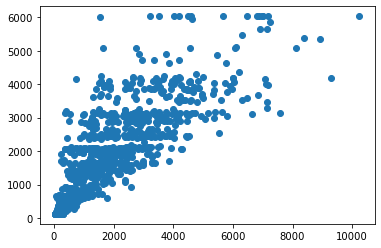

In [28]:
plt.scatter(y_test,predictions)

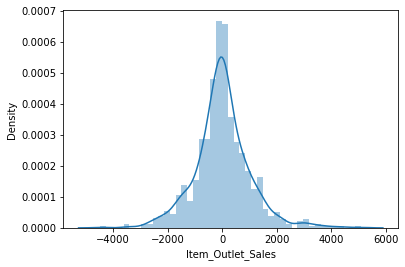

In [29]:
sns.distplot((y_test-predictions))

In [30]:
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test, predictions)))

1059098.566869684
721.3736726111298
1029.1251463596077


In [31]:
#Grid Search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': range(100,500,100)
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = 4, verbose = 2,scoring='neg_mean_absolute_error')
# Fit the grid search to the data
grid_search.fit(x, y)

grid_search.best_params_,grid_search.best_score_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  4.2min finished


({'n_estimators': 300}, -800.5593029244271)

## Decision Tree

In [44]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=300, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [45]:
# Predicting the test set results
y_pred = dt_regressor.predict(X_test)
y_pred

array([1117.58398204,  767.34452711,  767.34452711, 5058.42268489,
       3031.02027664,  638.15564795, 5058.42268489, 1965.60698981,
       1481.55842348, 3031.02027664,  206.92172552,  472.94083367,
       3822.76752308,  767.34452711,  767.34452711, 4129.28780627,
       1965.60698981, 2021.222324  , 2322.25613002, 2021.222324  ,
       3031.02027664, 2586.53056923, 3180.35451631, 2418.92981328,
       4129.28780627,  767.34452711,  472.94083367, 3822.76752308,
       3180.35451631, 3822.76752308,  767.34452711, 2838.76535565,
       2322.25613002, 3180.35451631,  472.94083367, 1481.55842348,
        767.34452711, 2322.25613002, 1117.58398204, 3180.35451631,
        206.92172552, 1965.60698981, 1481.55842348, 1565.26110571,
       2418.92981328, 1481.55842348,  767.34452711, 1117.58398204,
       4129.28780627, 1965.60698981,  767.34452711, 2322.25613002,
       1117.58398204,  206.92172552,  638.15564795, 1965.60698981,
       3031.02027664, 1965.60698981,  638.15564795, 3822.76752

In [46]:
tree_accuracy = round(dt_regressor.score(X_train,y_train),2)
tree_accuracy

0.58

In [49]:
r2_score(y_train, dt_regressor.predict(X_train))

0.5769429839537645

In [50]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1148611.0759976981
752.127046525269
1071.7327446699098
